# About this notebook

Data input and output functionality is needed as soon
as your data consists of more than three numbers that you can type in by hand.
The next step then is data handling. In the '90 we might have shown you
how to work with Excel, but in Python there something even more powerful: `pandas`.

In this notebook, we will take a look at Phyton's built-in data I/O functions
for easy file writing and reading. Helpful here are also `numpy` for writing
and reading arrays, as well as `pickle` that can pickle every object of Python.

`pandas` deserves an own introduction further below.

At the end, you should feel confident to do some simple file reading and writing
with Python and its basic tools.
There are no tasks to this notebook, but you can find a lot of tutorials online for `pandas`.


In [1]:
## you need to mount your Drive to load data in the next step
## just follow the instructions
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
# https://docs.python.org/3/library/pickle.html
import pickle

In [3]:
# you need to set the right path/folder here to where you saved the bootcamp
BASEPATH = "drive/My Drive/Beginner Python Bootcamp WS 22-23/"
# .. something like "drive/My Drive/your-folder/" -- don't forget / at the end!

# Data I&O (in and out)

In [6]:
# python read/write modules -- the basics

dct = {"a": 3, "b": 15, "cde": 12}

# the open function needs a file path, and in this case: the writing option "w"
with open(BASEPATH + "test_file.txt", "w") as f:
    for key, value in dct.items():
        # write into the file
        f.write(key + ": " + str(value) + "\n") # \n starts a new line
        print(key + ": " + str(value) + "\n")

a: 3

b: 15

cde: 12



In [7]:
# again, we open the file, and in this case: the reading option "r"
with open(BASEPATH + "test_file.txt", "r") as f:
    file_content = {} # empty dictionary
    # f.readlines() gives a list of all lines in the file
    # but: we also want to remove the newline character (\n)
    all_lines = f.readlines()
    for line in all_lines:
        line = line.strip() # remove the \n again
        splitted = line.split(": ") # split the string into two parts at ': '
        file_content[splitted[0]] = int(splitted[1]) # convert the string into an int
### and the dictionary is whole again!
print(file_content)
print(all_lines)

{'a': 3, 'b': 15, 'cde': 12}
['a: 3\n', 'b: 15\n', 'cde: 12\n']


In [8]:
# 'pickle' can save all objects as they are! but it's not human readable
# be careful with different software versions, sometimes this causes issues

# writing pickle needs the 'wb' option (write + binary)
with open(BASEPATH + "test_file.pickle", "wb") as f:
    pickle.dump(dct, f)


In [9]:
# reading pickle needs the 'rb' option (read + binary)
with open(BASEPATH + "test_file.pickle", "rb") as f:
    new_dct = pickle.load(f)

# very easy!
print(new_dct)

{'a': 3, 'b': 15, 'cde': 12}


In [10]:
# numpy
# it's great for reading and writing arrays
a = np.arange(20).reshape((4, 5))

np.savetxt(BASEPATH + "test_file_n.txt", a, fmt="%.0f")
b = np.genfromtxt(BASEPATH + "test_file_n.txt", dtype=int)
print(b)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [11]:
# numpy can also save non-human-readable files in its own format
a = np.arange(20).reshape((4, 5))
np.save(BASEPATH + "test_file_n.npy", a)
b = np.load(BASEPATH + "test_file_n.npy")
print(b)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


# Pandas: data science with python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...
* ... and for handling data bases!

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


**When do you need pandas?**

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # for cool plotting functions in addition to matplotlib
plt = sns.mpl.pyplot
sns.set_style("whitegrid")
pd.options.display.max_rows = 10

# 1. Let's start with a showcase

#### Case 1: planets

In [ ]:
## you need to copy planets.csv to your drive, then you can copy its path here
df = pd.read_csv(BASEPATH + "planets.csv", comment="#")

In [ ]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
df.head() # print first few items

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.tail(n=7) # print last 7 items

,method,number,orbital_period,mass,distance,year
1028,Transit,1,3.352057,NaN,3200.0,2012
1029,Imaging,1,NaN,NaN,10.1,2012
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


**DF overview**

In [ ]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


**A advanced way to read a table**

In [ ]:
no2 = pd.read_csv(
    BASEPATH + "planets.csv",
    sep=',', # there might be a ; or \t separator
    skiprows=[2,4], # skip some rows but BE CAREFUL TO NOT SKIP THE COLUMN NAMES
    na_values=[''], # NaN values might be encoded differently, e.g. "N/A"
    index_col=0, # set first column as index,
    comment="#" # this could also be e.g. %
)

In [ ]:
no2

,number,orbital_period,mass,distance,year
method,,,,,
Radial Velocity,1,874.774000,2.21,56.95,2008
Radial Velocity,1,326.030000,19.40,110.62,2007
Radial Velocity,1,516.220000,10.50,119.47,2009
Radial Velocity,1,185.840000,4.80,76.39,2008
Radial Velocity,1,1773.400000,4.64,18.15,2002
...,...,...,...,...,...
Transit,1,3.941507,NaN,172.00,2006
Transit,1,2.615864,NaN,148.00,2007
Transit,1,3.191524,NaN,174.00,2007


In [ ]:
## slicing
df[10:15]

,method,number,orbital_period,mass,distance,year
10,Radial Velocity,2,883.0,0.86,74.79,2010
11,Radial Velocity,1,335.1,9.88,39.43,2009
12,Radial Velocity,1,479.1,3.88,97.28,2008
13,Radial Velocity,3,1078.0,2.53,14.08,1996
14,Radial Velocity,3,2391.0,0.54,14.08,2001


**let's check which different methods have been used to identify planets**

In [ ]:
df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

#### a simple count function already tells you how many NaNs there are per column

In [ ]:
print("length:", len(df)) # number of rows
print("size:", df.size) # rows x columns = total number of values
print(df.count()) # gives you number of not-NaN values per column, because we know the length

length: 1035
size: 6210
method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64


'groupby' lets you analyze your data selected by values of one or more columns

In [ ]:
df.groupby("method").count() # one column

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [ ]:
multi_df = df.groupby(["method", "number"]).count() # more columns -> you'll get a multiindex, advanced pandas stuff ;)
multi_df

orbital_period  mass  distance  year
method                    number                                      
Astrometry                1                    2     0         2     2
Eclipse Timing Variations 1                    3     2         0     3
                          2                    6     0         4     6
Imaging                   1                    8     0        28    34
                          4                    4     0         4     4
...                                          ...   ...       ...   ...
Transit                   5                   25     0        15    25
                          6                    6     0         6     6
                          7                    7     0         7     7
Transit Timing Variations 2                    3     0         3     3
                          3                    0     0         0     1

[27 rows x 4 columns]

**What is the distribution of masses?**

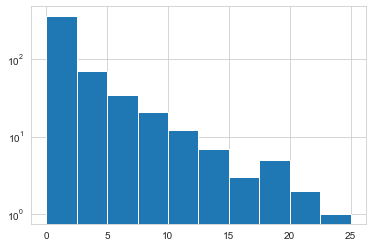

In [ ]:
ax = df['mass'].hist()
ax.set_yscale("log")

**distances?**

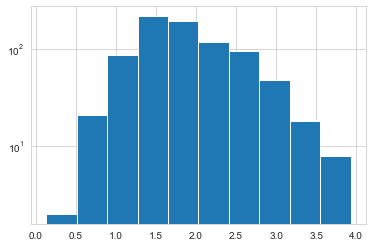

In [ ]:
ax = np.log10(df['distance']).hist()
ax.set_yscale("log")


**What is the mean and std orbital period grouped by method?** (you can get this also from the 'describe' function)

In [ ]:
df.groupby('method')[['orbital_period']].mean()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4751.644444
Imaging,118247.737500
Microlensing,3153.571429
Orbital Brightness Modulation,0.709307
Pulsar Timing,7343.021201
Pulsation Timing Variations,1170.000000
Radial Velocity,823.354680
Transit,21.102073


In [ ]:
df.groupby('method')[['orbital_period']].std()

,orbital_period
method,
Astrometry,544.217663
Eclipse Timing Variations,2499.130945
Imaging,213978.177277
Microlensing,1113.166333
Orbital Brightness Modulation,0.725493
Pulsar Timing,16313.265573
Pulsation Timing Variations,NaN
Radial Velocity,1454.926210
Transit,46.185893


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


**A advanced way to read a table**

In [ ]:
no2 = pd.read_csv(
    BASEPATH + "planets.csv",
    sep=',', # there might be a ; or \t separator
    skiprows=[2,4], # skip some rows but BE CAREFUL TO NOT SKIP THE COLUMN NAMES
    na_values=[''], # NaN values might be encoded differently, e.g. "N/A"
    index_col=0, # set first column as index,
    comment="#" # this could also be e.g. %
)

In [ ]:
no2

,number,orbital_period,mass,distance,year
method,,,,,
Radial Velocity,1,874.774000,2.21,56.95,2008
Radial Velocity,1,326.030000,19.40,110.62,2007
Radial Velocity,1,516.220000,10.50,119.47,2009
Radial Velocity,1,185.840000,4.80,76.39,2008
Radial Velocity,1,1773.400000,4.64,18.15,2002
...,...,...,...,...,...
Transit,1,3.941507,NaN,172.00,2006
Transit,1,2.615864,NaN,148.00,2007
Transit,1,3.191524,NaN,174.00,2007


In [ ]:
## slicing
df[10:15]

,method,number,orbital_period,mass,distance,year
10,Radial Velocity,2,883.0,0.86,74.79,2010
11,Radial Velocity,1,335.1,9.88,39.43,2009
12,Radial Velocity,1,479.1,3.88,97.28,2008
13,Radial Velocity,3,1078.0,2.53,14.08,1996
14,Radial Velocity,3,2391.0,0.54,14.08,2001


**let's check which different methods have been used to identify planets**

In [ ]:
df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

#### a simple count function already tells you how many NaNs there are per column

In [ ]:
print("length:", len(df)) # number of rows
print("size:", df.size) # rows x columns = total number of values
print(df.count()) # gives you number of not-NaN values per column, because we know the length

length: 1035
size: 6210
method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64


'groupby' lets you analyze your data selected by values of one or more columns

In [ ]:
df.groupby("method").count() # one column

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [ ]:
multi_df = df.groupby(["method", "number"]).count() # more columns -> you'll get a multiindex, advanced pandas stuff ;)
multi_df

orbital_period  mass  distance  year
method                    number                                      
Astrometry                1                    2     0         2     2
Eclipse Timing Variations 1                    3     2         0     3
                          2                    6     0         4     6
Imaging                   1                    8     0        28    34
                          4                    4     0         4     4
...                                          ...   ...       ...   ...
Transit                   5                   25     0        15    25
                          6                    6     0         6     6
                          7                    7     0         7     7
Transit Timing Variations 2                    3     0         3     3
                          3                    0     0         0     1

[27 rows x 4 columns]

**What is the distribution of masses?**

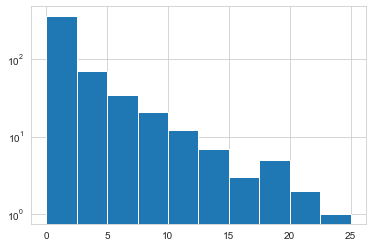

In [ ]:
ax = df['mass'].hist()
ax.set_yscale("log")

**distances?**

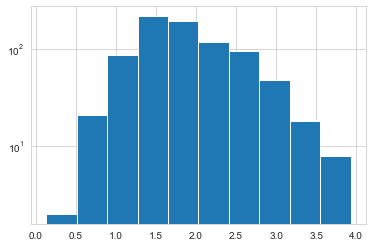

In [ ]:
ax = np.log10(df['distance']).hist()
ax.set_yscale("log")


**What is the mean and std orbital period grouped by method?** (you can get this also from the 'describe' function)

In [ ]:
df.groupby('method')[['orbital_period']].mean()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4751.644444
Imaging,118247.737500
Microlensing,3153.571429
Orbital Brightness Modulation,0.709307
Pulsar Timing,7343.021201
Pulsation Timing Variations,1170.000000
Radial Velocity,823.354680
Transit,21.102073


In [ ]:
df.groupby('method')[['orbital_period']].std()

,orbital_period
method,
Astrometry,544.217663
Eclipse Timing Variations,2499.130945
Imaging,213978.177277
Microlensing,1113.166333
Orbital Brightness Modulation,0.725493
Pulsar Timing,16313.265573
Pulsation Timing Variations,NaN
Radial Velocity,1454.926210
Transit,46.185893


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [ ]:
df.index

RangeIndex(start=0, stop=1035, step=1)

In [ ]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

To check the data types of the different columns:

In [ ]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

An overview of that information can be given with the `info()` method:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [ ]:
df.values

array([['Radial Velocity', 1, 269.3, 7.1, 77.4, 2006],
       ['Radial Velocity', 1, 874.7739999999999, 2.21, 56.95, 2008],
       ['Radial Velocity', 1, 763.0, 2.6, 19.84, 2011],
       ...,
       ['Transit', 1, 3.1915239, nan, 174.0, 2007],
       ['Transit', 1, 4.1250828, nan, 293.0, 2008],
       ['Transit', 1, 4.187757, nan, 260.0, 2008]], dtype=object)

**Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.**

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,capital
0,Belgium,Brussels
1,France,Paris
2,Germany,Berlin
3,Netherlands,Amsterdam
4,United Kingdom,London


**Another way of making a DF is by using a list of dicts**
This might come in handy when you e.g. read data from many files, put them in a list first and **then** make a DF. This is usually faster than using 'pd.concat' with single DFs (see below)

In [ ]:
data = [
    {"country": 'Japan', 'capital': 'Tokyo'}, 
    {"country": 'Spain', 'capital': 'Madrid'}
]
df_countries_2 = pd.DataFrame(data)

In [ ]:
df_countries_2

,country,capital
0,Japan,Tokyo
1,Spain,Madrid


**concat**

In [ ]:
all_countries = pd.concat([df_countries, df_countries_2])

In [ ]:
all_countries

,country,capital
0,Belgium,Brussels
1,France,Paris
2,Germany,Berlin
3,Netherlands,Amsterdam
4,United Kingdom,London
0,Japan,Tokyo
1,Spain,Madrid


In [ ]:
# option 1: make DF first, then concat list of DFs
dfs = []
for i in range(10):
    dfs.append(pd.DataFrame({"A": np.arange(2), "B": np.arange(2)}))

# option 2: make list first, then DF
df_list = []
for i in range(10):
    df_list.append({"A": np.arange(2), "B": np.arange(2)})

In [ ]:
%timeit pd.concat(dfs)

%timeit pd.DataFrame(df_list)

349 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
237 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**The difference here is not large, but imagine you need to concatenate large DFs!** 

(I tested it with much data, it makes a huge difference!) -> use lists, then pd.DataFrame

### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [ ]:
df['orbital_period']

0       269.300000
1       874.774000
2       763.000000
3       326.030000
4       516.220000
           ...    
1030      3.941507
1031      2.615864
1032      3.191524
1033      4.125083
1034      4.187757
Name: orbital_period, Length: 1035, dtype: float64

One column can also be accessed by . operator

In [ ]:
df.orbital_period

0       269.300000
1       874.774000
2       763.000000
3       326.030000
4       516.220000
           ...    
1030      3.941507
1031      2.615864
1032      3.191524
1033      4.125083
1034      4.187757
Name: orbital_period, Length: 1035, dtype: float64

In [ ]:
orbital_period = df['orbital_period']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [ ]:
orbital_period.index

RangeIndex(start=0, stop=1035, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
orbital_period.values[:10]

array([ 269.3  ,  874.774,  763.   ,  326.03 ,  516.22 ,  185.84 ,
       1773.4  ,  798.5  ,  993.3  ,  452.8  ])

We can access series values via the index, just like for NumPy arrays:

In [ ]:
orbital_period[0]

269.3

Unlike the NumPy array, though, this index can be something other than integers.

Note that now the index is not unique anymore! But you can still access items via their location index

In [ ]:
df = df.set_index('year')

In [ ]:
df

,method,number,orbital_period,mass,distance
year,,,,,
2006,Radial Velocity,1,269.300000,7.10,77.40
2008,Radial Velocity,1,874.774000,2.21,56.95
2011,Radial Velocity,1,763.000000,2.60,19.84
2007,Radial Velocity,1,326.030000,19.40,110.62
2009,Radial Velocity,1,516.220000,10.50,119.47
...,...,...,...,...,...
2006,Transit,1,3.941507,NaN,172.00
2007,Transit,1,2.615864,NaN,148.00
2007,Transit,1,3.191524,NaN,174.00


**'iloc' lets you access the data frame by location-index (like in a numpy array)**

In [ ]:
df.iloc[0]

method            Radial Velocity
number                          1
orbital_period              269.3
mass                          7.1
distance                     77.4
Name: 2006, dtype: object

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label** with ["label"], . ('dot', only for columns) or .loc['label'] (only for index)</li>
  <li>selection by **position** with .iloc </li>
</ul>
</div>

## Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
df.loc[2006, 'mass']

year
2006    7.10
2006     NaN
2006    7.60
2006     NaN
2006    0.91
        ... 
2006     NaN
2006     NaN
2006     NaN
2006     NaN
2006     NaN
Name: mass, Length: 31, dtype: float64

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
df.iloc[0:2,1:3]

,number,orbital_period
year,,
2006,1,269.300
2008,1,874.774


The different indexing methods can also be used to assign data:

In [ ]:
df.loc[2006, 'mass'] = 100

In [ ]:
df

,method,number,orbital_period,mass,distance
year,,,,,
2006,Radial Velocity,1,269.300000,100.00,77.40
2008,Radial Velocity,1,874.774000,2.21,56.95
2011,Radial Velocity,1,763.000000,2.60,19.84
2007,Radial Velocity,1,326.030000,19.40,110.62
2009,Radial Velocity,1,516.220000,10.50,119.47
...,...,...,...,...,...
2006,Transit,1,3.941507,100.00,172.00
2007,Transit,1,2.615864,NaN,148.00
2007,Transit,1,3.191524,NaN,174.00


### we can select a Series from our newly-indexed DF

In [ ]:
orbital_period = df['orbital_period']
orbital_period

year
2006    269.300000
2008    874.774000
2011    763.000000
2007    326.030000
2009    516.220000
           ...    
2006      3.941507
2007      2.615864
2007      3.191524
2008      4.125083
2008      4.187757
Name: orbital_period, Length: 1035, dtype: float64

Now we can see that one 'year-index' has multiple hits:

In [ ]:
orbital_period[2006]

year
2006       269.300000
2006              NaN
2006       594.900000
2006              NaN
2006      1845.000000
            ...      
2006      3300.000000
2006    730000.000000
2006         4.200000
2006         1.796000
2006         3.941507
Name: orbital_period, Length: 31, dtype: float64

Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [ ]:
orbital_period * 1000

year
2006    269300.00000
2008    874774.00000
2011    763000.00000
2007    326030.00000
2009    516220.00000
            ...     
2006      3941.50685
2007      2615.86400
2007      3191.52390
2008      4125.08280
2008      4187.75700
Name: orbital_period, Length: 1035, dtype: float64

A range of methods:

In [ ]:
orbital_period.mean()

2002.9175960947584

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
orbital_period[orbital_period > 1500]

year
2002      1773.4
2001      2391.0
2009     14002.0
2002      4909.0
2009     10220.0
          ...   
2005      3500.0
2008      1825.0
2008      5100.0
2006    730000.0
2003     36525.0
Name: orbital_period, Length: 117, dtype: float64

**But also a lot of pandas specific methods, e.g.**

In [ ]:
df['method'].count() # only counts how many items there are

1035

In [ ]:
df['method'].value_counts() # counts per value of 'method'

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [ ]:
df['mass'].max()

100.0

In [ ]:
df['mass'].median()

1.47

<div class="alert alert-success">

<b>NOTE</b>:

 <ul>
  <li>Usually there are many different solution to selecting/analyzing data in DataFrames!</li>
</ul>
</div>

# The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [ ]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [ ]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [ ]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure


Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [ ]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [ ]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [ ]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# Bonus - LaTeX output!

Easily copy your data frame into a LaTeX document :)

In [ ]:
print(all_countries.to_latex(escape=False))

\begin{tabular}{lll}
\toprule
{} &         country &    capital \\
\midrule
0 &         Belgium &   Brussels \\
1 &          France &      Paris \\
2 &         Germany &     Berlin \\
3 &     Netherlands &  Amsterdam \\
4 &  United Kingdom &     London \\
0 &           Japan &      Tokyo \\
1 &           Spain &     Madrid \\
\bottomrule
\end{tabular}



/tmp/ipykernel_728/3020637283.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_countries.to_latex(escape=False))
